In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os
import sklearn 

In [2]:
os.getcwd()

'/Users/syedmeesumalizaidi'

In [3]:
df = pd.read_csv("final_data_with_slopes.csv")

In [4]:
df = df.drop(columns=['Height_last','Height_max','Height_med','Height_min','Height_mode','Height_slope','Height_std',
'Gender_last','Gender_max','Gender_med','Gender_min','Gender_mode','Gender_slope','Gender_std',
'Age_last','Age_max','Age_med','Age_min','Age_mode','Age_slope','Age_std','Unnamed: 0',
'SAPS-I','SOFA','Length_of_stay','Survival','ICUType_first','ICUType_last','ICUType_max','ICUType_med','ICUType_min','ICUType_mode','ICUType_slope','ICUType_std'])

In [5]:
record_col = df["RecordID"]
df = df.drop(columns=['RecordID'])

In [6]:
df.head()

,ALP_first,ALP_last,ALP_max,ALP_med,ALP_min,ALP_mode,ALP_slope,ALP_std,ALT_first,ALT_last,...,Weight_std,pH_first,pH_last,pH_max,pH_med,pH_min,pH_mode,pH_slope,pH_std,In-hospital_death
0,79.0,78.0,80.5,78.0,75.0,78.0,0.113020,7.567722,31.0,31.0,...,0.000000,7.38,7.405,7.44,7.39,7.32,7.39,0.000124,0.043012,0
1,46.0,46.0,46.0,46.0,46.0,46.0,0.589744,7.567722,34.0,34.0,...,0.000000,7.39,7.450,7.48,7.43,7.39,7.41,0.000464,0.040311,0
2,79.0,78.0,80.5,78.0,75.0,78.0,0.113020,7.567722,31.0,31.0,...,0.144093,7.34,7.400,7.41,7.35,7.29,7.34,0.000206,0.037001,0
3,79.0,78.0,80.5,78.0,75.0,78.0,0.113020,7.567722,31.0,31.0,...,0.144093,7.38,7.405,7.44,7.39,7.32,7.39,0.000124,0.043012,0
4,79.0,78.0,80.5,78.0,75.0,78.0,0.113020,7.567722,31.0,31.0,...,10.898434,7.38,7.405,7.44,7.39,7.32,7.39,0.000124,0.043012,0


In [7]:
df.describe()

,ALP_first,ALP_last,ALP_max,ALP_med,ALP_min,ALP_mode,ALP_slope,ALP_std,ALT_first,ALT_last,...,Weight_std,pH_first,pH_last,pH_max,pH_med,pH_min,pH_mode,pH_slope,pH_std,In-hospital_death
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,...,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,90.352000,89.112750,93.531750,89.128875,84.842000,89.064500,0.358825,9.117946,84.696250,93.003750,...,0.989973,7.457797,7.444007,7.936937,7.440683,7.357792,7.430175,0.008169,0.205090,0.138500
std,73.512717,74.373183,83.119924,69.825868,62.977302,74.183766,1.522130,18.019679,414.483464,444.370425,...,2.852960,2.797903,1.959402,16.724947,2.067537,1.943463,1.959848,0.145167,5.715049,0.345467
min,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,-3.562500,0.000000,1.000000,3.000000,...,0.000000,1.000000,7.030000,7.130000,7.105000,1.000000,6.910000,-7.966364,0.000000,0.000000
25%,79.000000,78.000000,80.500000,78.000000,75.000000,78.000000,0.113020,7.567722,31.000000,31.000000,...,0.000000,7.340000,7.380000,7.420000,7.365000,7.290000,7.360000,0.000009,0.035890,0.000000
50%,79.000000,78.000000,80.500000,78.000000,75.000000,78.000000,0.113020,7.567722,31.000000,31.000000,...,0.144093,7.380000,7.405000,7.440000,7.390000,7.320000,7.390000,0.000124,0.043012,0.000000
75%,79.000000,78.000000,80.500000,78.000000,75.000000,78.000000,0.113020,7.567722,31.000000,31.000000,...,0.945455,7.410000,7.430000,7.470000,7.410000,7.360000,7.410000,0.000255,0.051494,0.000000
max,1752.000000,2205.000000,2205.000000,1501.000000,1339.000000,2205.000000,68.000000,890.490520,9890.000000,8980.000000,...,50.302364,100.000000,96.000000,735.000000,95.000000,94.000000,96.000000,3.133333,283.047116,1.000000


In [8]:
target_col = df["In-hospital_death"]
df = df.drop(columns=['In-hospital_death'])

In [9]:
#import the necessary module
from sklearn.model_selection import train_test_split
#split data set into train and test sets
data_train, data_test, target_train, target_test = train_test_split(df,target_col, test_size = 0.20, random_state = 10)

In [10]:
# import the necessary module
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
#create an object of the type GaussianNB
gnb = GaussianNB()
#train the algorithm on training data and predict using the testing data
pred = gnb.fit(data_train, target_train).predict(data_test)
#print(pred.tolist())
#print the accuracy score of the model
print("Naive-Bayes accuracy : ",accuracy_score(target_test, pred, normalize = True))

Naive-Bayes accuracy :  0.79875


In [11]:
#import the necessary modules
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
#create an object of type LinearSVC
svc_model = LinearSVC(random_state=10)
#train the algorithm on training data and predict using the testing data
pred = svc_model.fit(data_train, target_train).predict(data_test)
#print the accuracy score of the model
print("LinearSVC accuracy : ",accuracy_score(target_test, pred, normalize = True))

LinearSVC accuracy :  0.86375


/anaconda3/envs/py3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [12]:
#import necessary modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
#create object of the lassifier
neigh = KNeighborsClassifier(n_neighbors=3)
#Train the algorithm
neigh.fit(data_train, target_train)
# predict the response
pred = neigh.predict(data_test)
# evaluate accuracy
print ("KNeighbors accuracy score : ",accuracy_score(target_test, pred))

KNeighbors accuracy score :  0.85375


In [13]:
from sklearn.neural_network import MLPClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [14]:
GPC = GaussianProcessClassifier(1.0 * RBF(1.0))
Dtree = DecisionTreeClassifier(max_depth=5)
Rforest = RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1)
NN = MLPClassifier(alpha=1, max_iter=1000)
AdaBoost = AdaBoostClassifier()
QuardDisc = QuadraticDiscriminantAnalysis()

In [15]:
#import cross validation from sklearn
from sklearn.model_selection import cross_val_score

In [16]:
#GNB accuracy
scores = cross_val_score(gnb, df, target_col, cv=5)
print("GNB Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

GNB Accuracy: 0.79 (+/- 0.03)


In [17]:
#LinearSVC accuracy
scores = cross_val_score(svc_model, df, target_col, cv=5)
print("LinearSVC Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

/anaconda3/envs/py3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/envs/py3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/envs/py3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/envs/py3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC Accuracy: 0.71 (+/- 0.35)


/anaconda3/envs/py3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [18]:
#KNeighbors accuracy
scores = cross_val_score(neigh, df, target_col, cv=5)
print("KNeighbors Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

KNeighbors Accuracy: 0.84 (+/- 0.01)


In [19]:
#GPC accuracy
scores = cross_val_score(GPC, df, target_col, cv=5)
print("GPC Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

GPC Accuracy: 0.86 (+/- 0.00)


In [20]:
#Dtree accuracy
scores = cross_val_score(Dtree, df, target_col, cv=5)
print("Dtree Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Dtree Accuracy: 0.85 (+/- 0.01)


In [21]:
#Rforest accuracy
scores = cross_val_score(Rforest, df, target_col, cv=5)
print("Rforest Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Rforest Accuracy: 0.86 (+/- 0.00)


In [22]:
#NN accuracy
scores = cross_val_score(NN, df, target_col, cv=5)
print("NN Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

NN Accuracy: 0.80 (+/- 0.24)


In [23]:
#AdaBoost accuracy
scores = cross_val_score(AdaBoost, df, target_col, cv=5)
print("AdaBoost Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

AdaBoost Accuracy: 0.86 (+/- 0.02)


In [24]:
#QuardDisc accuracy
scores = cross_val_score(QuardDisc, df, target_col, cv=5)
print("QuardDisc Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

/anaconda3/envs/py3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:693: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/anaconda3/envs/py3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:693: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/anaconda3/envs/py3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:693: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/anaconda3/envs/py3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:693: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/anaconda3/envs/py3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:693: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/anaconda3/envs/py3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:693: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


QuardDisc Accuracy: 0.69 (+/- 0.07)


/anaconda3/envs/py3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:693: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/anaconda3/envs/py3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:693: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/anaconda3/envs/py3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:693: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/anaconda3/envs/py3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:693: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


In [25]:
#import classification report from yellowbrick
from yellowbrick.classifier import ClassificationReport

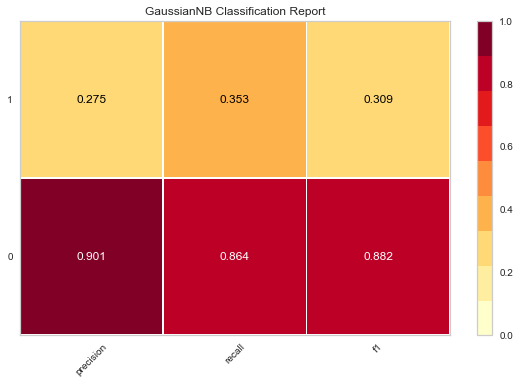

In [26]:
#GNB Accuracy Visualisation
# Instantiate the classification model and visualizer
visualizer = ClassificationReport(gnb, classes=[0,1])
visualizer.fit(data_train, target_train) # Fit the training data to the visualizer
visualizer.score(data_test, target_test) # Evaluate the model on the test data
g = visualizer.poof() # Draw/show/poof the data

/anaconda3/envs/py3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


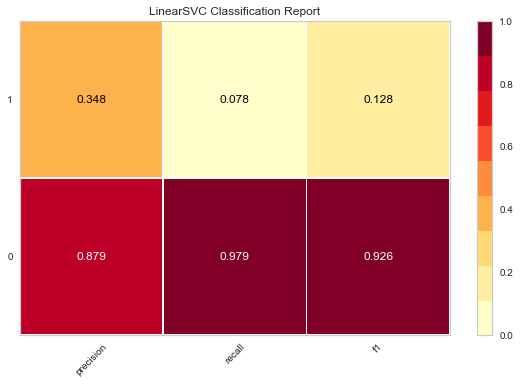

In [27]:
#LinearSVC Accuracy Visualisation
# Instantiate the classification model and visualizer
visualizer = ClassificationReport(svc_model, classes=[0,1])
visualizer.fit(data_train, target_train) # Fit the training data to the visualizer
visualizer.score(data_test, target_test) # Evaluate the model on the test data
g = visualizer.poof() # Draw/show/poof the data

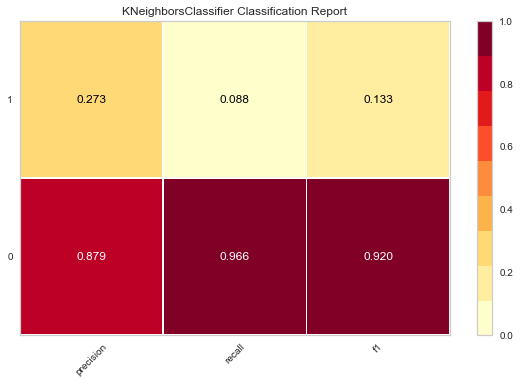

In [28]:
#KNeighbors Accuracy Visualisation
# Instantiate the classification model and visualizer
visualizer = ClassificationReport(neigh, classes=[0,1])
visualizer.fit(data_train, target_train) # Fit the training data to the visualizer
visualizer.score(data_test, target_test) # Evaluate the model on the test data
g = visualizer.poof() # Draw/show/poof the data

/anaconda3/envs/py3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


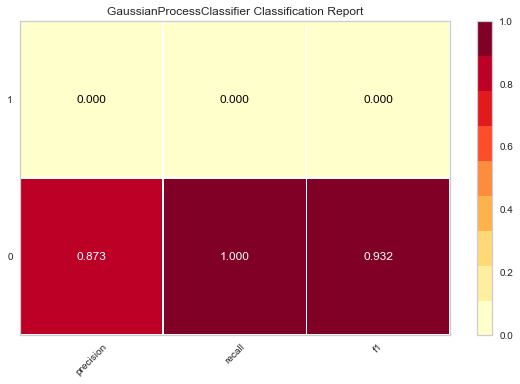

In [29]:
#GPC Accuracy Visualisation
# Instantiate the classification model and visualizer
visualizer = ClassificationReport(GPC, classes=[0,1])
visualizer.fit(data_train, target_train) # Fit the training data to the visualizer
visualizer.score(data_test, target_test) # Evaluate the model on the test data
g = visualizer.poof() # Draw/show/poof the data

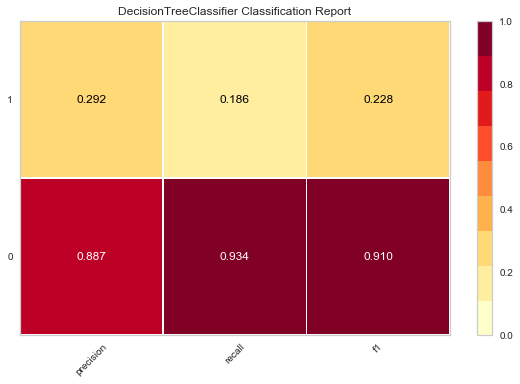

In [30]:
#Dtree Accuracy Visualisation
# Instantiate the classification model and visualizer
visualizer = ClassificationReport(Dtree, classes=[0,1])
visualizer.fit(data_train, target_train) # Fit the training data to the visualizer
visualizer.score(data_test, target_test) # Evaluate the model on the test data
g = visualizer.poof() # Draw/show/poof the data

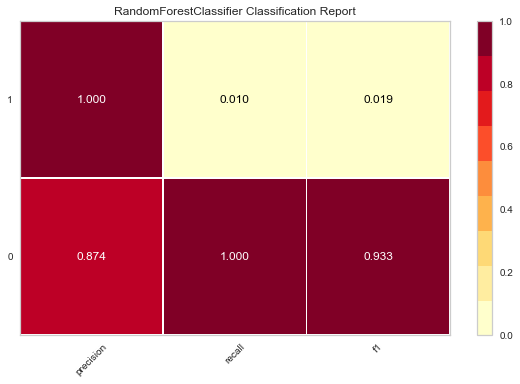

In [31]:
#Rforest Accuracy Visualisation
# Instantiate the classification model and visualizer
visualizer = ClassificationReport(Rforest, classes=[0,1])
visualizer.fit(data_train, target_train) # Fit the training data to the visualizer
visualizer.score(data_test, target_test) # Evaluate the model on the test data
g = visualizer.poof() # Draw/show/poof the data

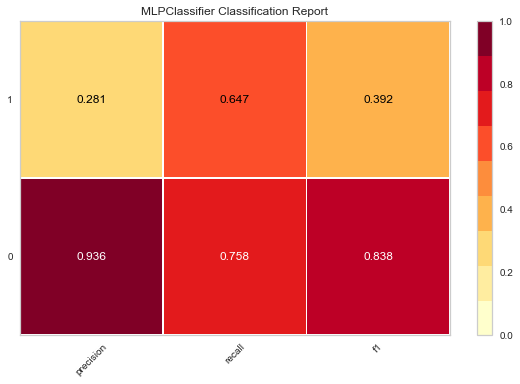

In [32]:
#NN Accuracy Visualisation
# Instantiate the classification model and visualizer
visualizer = ClassificationReport(NN, classes=[0,1])
visualizer.fit(data_train, target_train) # Fit the training data to the visualizer
visualizer.score(data_test, target_test) # Evaluate the model on the test data
g = visualizer.poof() # Draw/show/poof the data

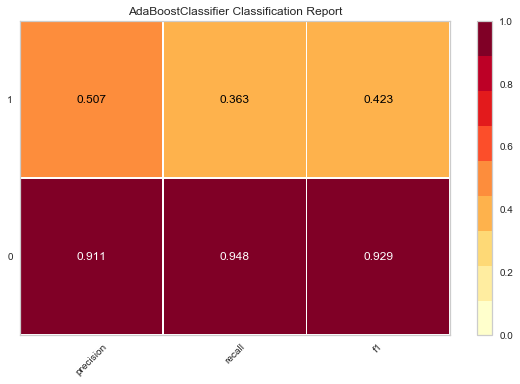

In [33]:
#AdaBoost Accuracy Visualisation
# Instantiate the classification model and visualizer
visualizer = ClassificationReport(AdaBoost, classes=[0,1])
visualizer.fit(data_train, target_train) # Fit the training data to the visualizer
visualizer.score(data_test, target_test) # Evaluate the model on the test data
g = visualizer.poof() # Draw/show/poof the data

/anaconda3/envs/py3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:693: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/anaconda3/envs/py3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:693: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


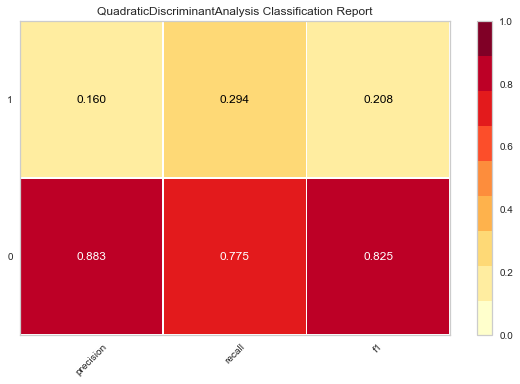

In [34]:
#QuardDisc Accuracy Visualisation
# Instantiate the classification model and visualizer
visualizer = ClassificationReport(QuardDisc, classes=[0,1])
visualizer.fit(data_train, target_train) # Fit the training data to the visualizer
visualizer.score(data_test, target_test) # Evaluate the model on the test data
g = visualizer.poof() # Draw/show/poof the data